In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os

In [107]:
def graph_radii_height(plant_name, dirpath, save_path):
    raw = []
    os.chdir(dirpath)
    for file in glob.glob("*.npz"):
        raw.append((file, np.load(file)))
    raw = sorted(raw, key = lambda x: int(x[0].split('_')[1].split('.')[0]), reverse=True)
    time_steps = np.arange(1, len(raw)+1)

    data = []
    for d in raw:
        data.append(d[1])

    radii = []
    height = []
    for d in data:
        radii.append(d['radii'][0])
        height.append(d['heights'][0])

    plt.figure(figsize=(12,10))
    plt.title(plant_name + ' Radius Growth, No Pruning')
    plt.xlabel('Day')
    plt.ylabel('Radius')
    plt.plot(time_steps, radii)
    plt.savefig(save_path + 'radii.png')
    plt.show()
    
    plt.figure(figsize=(12,10))
    plt.title(plant_name + ' Height Growth, No Pruning')
    plt.xlabel('Day')
    plt.ylabel('Height')
    plt.plot(time_steps, height)
    plt.savefig(save_path + 'height.png')
    plt.show()

In [196]:
def graph_multiple_radii_height(plant_name, dirpath, save_path, n_plants):
    raw = []
    os.chdir(dirpath)
    for file in glob.glob("*.npz"):
        raw.append((file, np.load(file)))
    raw = sorted(raw, key = lambda x: int(x[0].split('_')[1].split('.')[0]), reverse=True)
#     time_steps = np.arange(1, len(raw)+1)
    time_steps = np.arange(200)
    
    # PRUNE STEPS:
    prunings = [42, 44, 46, 50, 52, 92, 94, 99, 106, 115, 117, 120, 126, 141, 143, 156]
    a_prunings = []
    b_prunings = []
    for p in prunings:
        if p % 2 != 0:
            b_prunings.append(p//2)
        else:
            a_prunings.append(p//2)

    data = []
    for d in raw:
        data.append(d[1])

    a_radii = []
    b_radii = []
    a_height = []
    b_height = []
#     radii = []
#     height = []
    for d in data:
        if d['radii'][0][0] == 'dill':
            a_radii.append(d['radii'][0][1])
        else:
            b_radii.append(d['radii'][0][1])
        
        if d['heights'][0][0] == 'dill':
            a_height.append(d['heights'][0][1])
        else:
            b_height.append(d['heights'][0][1])
            
#         radii.append(d['radii'])
#         height.append(d['heights'])
    a_radii = np.array(a_radii)
    b_radii = np.array(b_radii)
    a_height = np.array(a_height)
    b_height = np.array(b_height)
#     radii = np.array(radii)
#     height = np.array(height)
    
#     labels = np.unique(radii[:,:,0])
    labels = ['dill', 'marigold']
        
    plt.figure(figsize=(18,8))
    plt.title(plant_name + ' Radius Growth, No Pruning')
    plt.xlabel('Day')
    plt.ylabel('Radius')
    plt.xlim(0, 210)
    plt.xticks(np.arange(0, 210, 10))
    plt.yticks(np.arange(0, 20, 2))
    plt.plot(time_steps, a_radii.astype(np.float), color='r', label=labels[0])
    plt.plot(time_steps, b_radii.astype(np.float), color='b', label=labels[1])
    plt.legend(loc='lower right')
    # PRUNE LINES
    for xc in a_prunings:
        plt.axvline(x=xc, color='r', linestyle='-', linewidth=0.5)
    for xc in b_prunings:
        plt.axvline(x=xc, color='b', linestyle='-', linewidth=0.5)
    plt.savefig(save_path + 'radii.png')
    plt.show()
    
    plt.figure(figsize=(18,8))
    plt.title(plant_name + ' Height Growth, No Pruning')
    plt.xlabel('Day')
    plt.ylabel('Height')
    plt.xlim(0, 210)
    plt.xticks(np.arange(0, 210, 10))
    plt.yticks(np.arange(0, 20, 2))
    plt.plot(time_steps, a_height.astype(np.float), color='r', label=labels[0])
    plt.plot(time_steps, b_height.astype(np.float), color='b', label=labels[1])
    plt.legend(loc='lower right')
    # PRUNE LINES
    for xc in a_prunings:
        plt.axvline(x=xc, color='r', linestyle='-', linewidth=0.5)
    for xc in b_prunings:
        plt.axvline(x=xc, color='b', linestyle='-', linewidth=0.5)
    plt.savefig(save_path + 'height.png')
    plt.show()
    
#     plt.figure(figsize=(12,10))
#     plt.title(plant_name + ' Radius Growth, No Pruning')
#     plt.xlabel('Day')
#     plt.ylabel('Radius')
#     plt.xlim(0, 210)
#     plt.xticks(np.arange(0, 210, 10))
#     plt.yticks(np.arange(0, 20, 2))
#     for i in range(n_plants):
#         plt.plot(time_steps, radii[:,i,1].astype(np.float), label=labels[i])
#     plt.legend(loc='lower right')
#     plt.savefig(save_path + 'radii.png')
#     plt.show()
    
#     plt.figure(figsize=(12,10))
#     plt.title(plant_name + ' Height Growth, No Pruning')
#     plt.xlabel('Day')
#     plt.ylabel('Height')
#     plt.xlim(0, 210)
#     plt.xticks(np.arange(0, 210, 10))
#     plt.yticks(np.arange(0, 20, 2))
#     for i in range(n_plants):
#         plt.plot(time_steps, height[:,i,1].astype(np.float), label=labels[i])
#     plt.legend(loc='lower right')
#     plt.savefig(save_path + 'height.png')
#     plt.show()

In [6]:
def graph_entropy(dirpath, save_path):
    raw = []
    os.chdir(dirpath)
    for file in glob.glob("*.npz"):
        raw.append((file, np.load(file)))
    raw = sorted(raw, key = lambda x: int(x[0].split('_')[1].split('.')[0]), reverse=True)
    time_steps = np.arange(1, (len(raw)+1))

    data = []
    for d in raw:
        data.append(d[1])
    
    # PRUNE STEPS:
#     prunings = np.array([42, 44, 46, 50, 52, 92, 94, 99, 106, 115, 117, 120, 126, 141, 143, 156])

    entropy = []
    for i, d in enumerate(data):
#         if i % 2 != 0:
        global_cc_vec = d['global_cc']
        prob = global_cc_vec[:] / np.sum(global_cc_vec[:])
        prob = prob[np.where(prob > 0)]
        curr_entropy = -np.sum(prob * np.log(prob), dtype="float") / np.log(20)
        entropy.append(curr_entropy)
    
    plt.figure(figsize=(14,8))
    plt.title('Entropy Over Time')
    plt.xlabel('Observation # (thousands)')
    plt.ylabel('Entropy')
    plt.plot(time_steps, entropy)
    # PRUNE LINES
#     for xc in prunings:
#         plt.axvline(x=xc, color='g', linestyle='-', linewidth=0.5)
    plt.savefig(save_path + 'entropy.png')
    plt.show()

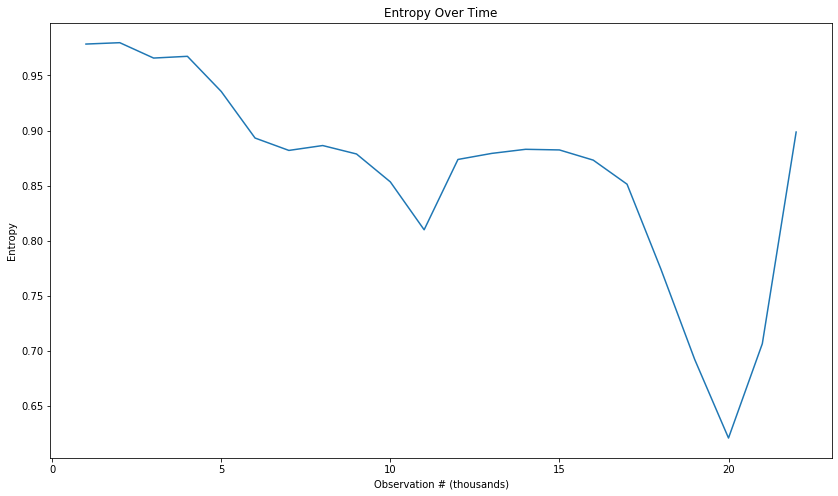

In [7]:
path = '/Users/williamwong/Desktop/pruning/200_plants_step_0.25to0.75_thresh0.85/'
graph_entropy(path, path)

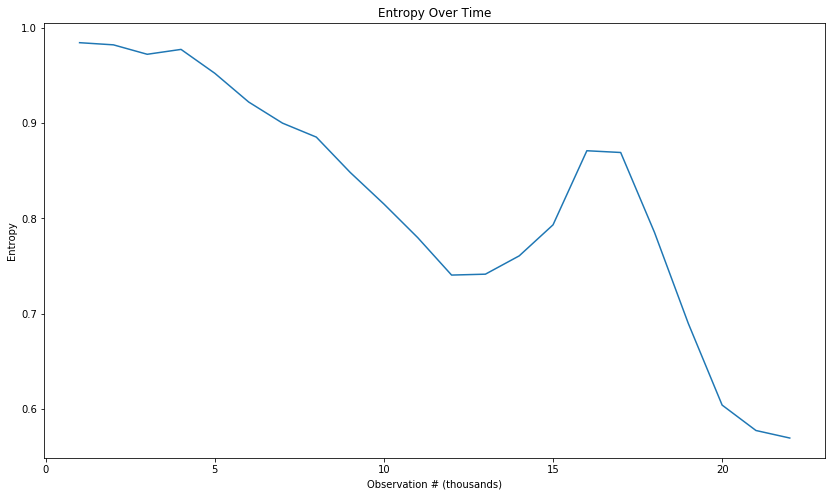

In [8]:
path = '/Users/williamwong/Desktop/pruning/200_plants_sigmoid_1.5exp, 0.26'
graph_entropy(path, path)

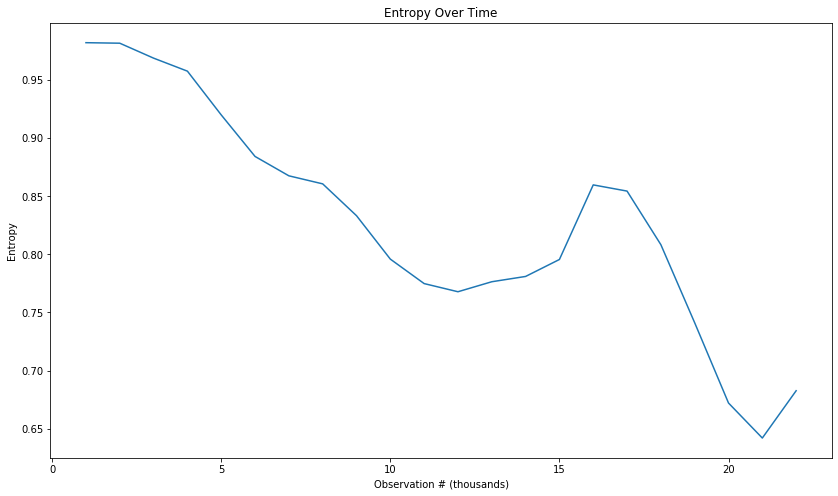

In [10]:
path = '/Users/williamwong/Desktop/pruning/200_plants_sigmoid_0.3'
graph_entropy(path, path)

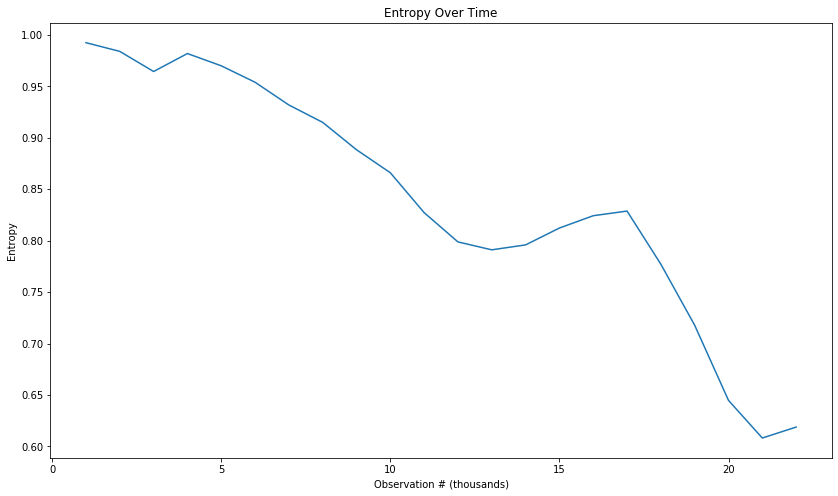

In [11]:
path = '/Users/williamwong/Desktop/pruning/200_plants_entropy_0.3'
graph_entropy(path, path)

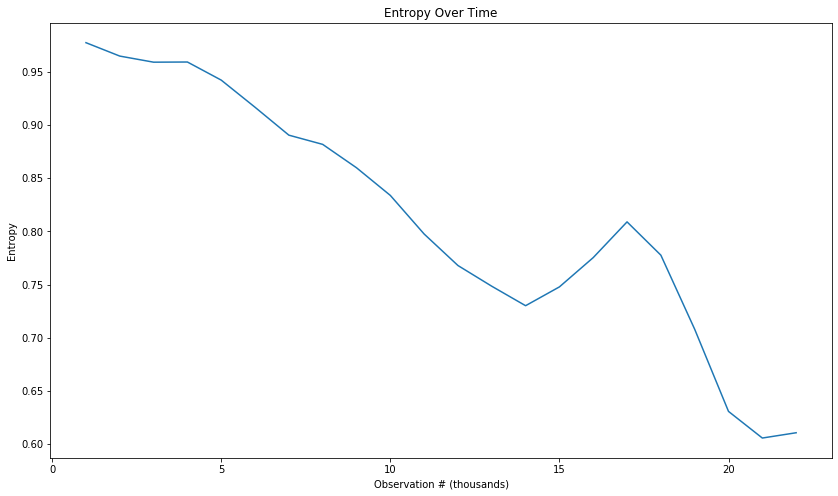

In [13]:
path = '/Users/williamwong/Desktop/pruning/200_plants_entropy_0.25'
graph_entropy(path, path)